In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with_time = True
if with_time:
    all_events = pd.read_csv('../cleaned_data/all_events_data_w_time.csv')
else:
    all_events = pd.read_csv('../cleaned_data/all_events_data.csv')

In [3]:
all_events.head()

,Unnamed: 0,events,subject_id,time,eve_index
0,0,V3000,10000019,2129-05-21 19:16:00,26446
1,1,640,10000019,2129-05-21 19:16:00,5346
2,2,V290,10000019,2129-05-21 19:16:00,26425
3,3,V053,10000019,2129-05-21 19:16:00,26072
4,4,V502,10000019,2129-05-21 19:16:00,26637


In [4]:
np.unique(all_events.subject_id).shape

(256855,)

In [5]:
# event counts of all ids
all_count = all_events.groupby('subject_id')['eve_index'].agg([('count',lambda x: len(x))])

In [6]:
all_count.reset_index(inplace=True)

In [7]:
all_count.head()

,subject_id,count
0,10000019,10
1,10000032,127
2,10000044,7
3,10000068,2
4,10000074,6


In [8]:
all_count.describe()

,subject_id,count
count,2.568550e+05,256855.000000
mean,1.501198e+07,92.157342
std,2.885680e+06,196.270050
min,1.000002e+07,1.000000
25%,1.251270e+07,11.000000
50%,1.501746e+07,33.000000
75%,1.751055e+07,94.000000
max,1.999999e+07,9529.000000


In [9]:
# Control / Case group
case_id1 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24424','subject_id'])

In [10]:
case_id2 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24429','subject_id'])

In [11]:
case_id3 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24420','subject_id'])

In [12]:
case_id4 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24410','subject_id'])

In [13]:
case_id5 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24414','subject_id'])

In [14]:
case_id6 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24419','subject_id'])

In [15]:
case_id7 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24430','subject_id'])
case_id8 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24434','subject_id'])
case_id9 = pd.unique(all_events.loc[all_events['events'].str[:15] == 'O24439','subject_id'])

In [16]:
case_id7

array([12139584, 12794063, 15426262], dtype=int64)

In [17]:
case_id = case_id1
list = [case_id2,case_id3,case_id4,case_id5,case_id6,case_id7,case_id8,case_id9]
for i in list:
    case_id = np.append(case_id,i)

In [18]:
case_id.shape

(400,)

In [19]:
case_id = pd.unique(case_id)

In [20]:
case_id.shape

(363,)

In [21]:
control_id =np.setdiff1d(np.unique(all_events['subject_id'].values),case_id)

In [22]:
control_id.shape

(256492,)

In [23]:
control = all_events.loc[np.in1d(all_events['subject_id'],control_id),:]
case = all_events.loc[np.in1d(all_events['subject_id'],case_id),:]

In [24]:
control.head()

,Unnamed: 0,events,subject_id,time,eve_index
0,0,V3000,10000019,2129-05-21 19:16:00,26446
1,1,640,10000019,2129-05-21 19:16:00,5346
2,2,V290,10000019,2129-05-21 19:16:00,26425
3,3,V053,10000019,2129-05-21 19:16:00,26072
4,4,V502,10000019,2129-05-21 19:16:00,26637


In [25]:
case.head()

,Unnamed: 0,events,subject_id,time,eve_index
62254,60813,V270,10026821,2134-06-02 07:12:00,26406
62255,60814,741,10026821,2134-06-02 07:12:00,6699
62256,60815,65971,10026821,2134-06-02 07:12:00,5645
62257,60816,65681,10026821,2134-06-02 07:12:00,5612
62258,60105,timetoken0-2day,10026821,2134-06-02 07:12:00,36802


In [26]:
np.unique(control.subject_id).shape

(256492,)

In [27]:
np.unique(case.subject_id).shape

(363,)

In [28]:
observation_window = 2000

In [29]:
control_index_date = control.groupby(['subject_id'], \
                    as_index=False)['time'].agg({'index_date': lambda x: pd.to_datetime(x).max()})

In [30]:
control_filter = pd.merge(control,control_index_date,how='left',on = ['subject_id'])

In [31]:
#observation window is set to be 2000 days
choice1 = pd.to_datetime(control_filter['time'])>= pd.to_datetime(control_filter['index_date']) - pd.DateOffset(observation_window)
choice2 = pd.to_datetime(control_filter['time']) <= pd.to_datetime(control_filter['index_date'])
control_filter = control_filter[choice1 & choice2]
control_filter.head()

,Unnamed: 0,events,subject_id,time,eve_index,index_date
0,0,V3000,10000019,2129-05-21 19:16:00,26446,2129-05-22 16:00:00
1,1,640,10000019,2129-05-21 19:16:00,5346,2129-05-22 16:00:00
2,2,V290,10000019,2129-05-21 19:16:00,26425,2129-05-22 16:00:00
3,3,V053,10000019,2129-05-21 19:16:00,26072,2129-05-22 16:00:00
4,4,V502,10000019,2129-05-21 19:16:00,26637,2129-05-22 16:00:00


In [45]:
np.unique(control_filter.subject_id).shape

(256492,)

(array([190999,  33102,  13357,   6581,   3822,   2418,   1557,   1107,
          763,    610,    414,    335,    250,    174,    168,    109,
           89,     95,     70,     71,     42,     49,     42,     31,
           28,     31,     21,     22,     10,     16,     20,      9,
           11,      7,      5,     11,      6,      3,      6,      2,
            1,      3,      4,      1,      0,      2,      1,      1,
            4,      1,      2,      1,      1,      0,      0,      0,
            0,      0,      0,      0,      1,      1,      1,      0,
            0,      1,      0,      1,      0,      0,      0,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      1], dtype=int64), array([1.00000e+00, 8.63900e+01, 1.71780e+02, 2.57170e+02, 3.42560e+02,
       4.27950e+02, 5

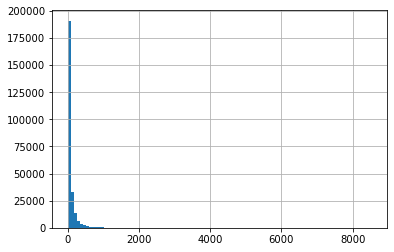

In [53]:
# control count
count_control = control_filter.groupby('subject_id').apply(lambda x: x.eve_index.size)
count_control.hist(bins=100)
print(np.histogram(count_control,bins=100))
print(np.mean(count_control)); print(np.median(count_control)); print(np.std(count_control))

In [34]:
count_control

subject_id
10000019      10
10000032     127
10000044       7
10000068       2
10000074       6
            ... 
19999768     135
19999784    1063
19999828     264
19999840     164
19999987      94
Length: 256492, dtype: int64

In [38]:
count_control.shape

(256492,)

In [33]:
# filter out control IDs with count >500 & count<30 ??
control_filter =pd.merge(control_filter, all_count,on='subject_id',how='left')


In [34]:
control_filter.head()

,Unnamed: 0,events,subject_id,time,eve_index,index_date,count
0,0,V3000,10000019,2129-05-21 19:16:00,26446,2129-05-22 16:00:00,10
1,1,640,10000019,2129-05-21 19:16:00,5346,2129-05-22 16:00:00,10
2,2,V290,10000019,2129-05-21 19:16:00,26425,2129-05-22 16:00:00,10
3,3,V053,10000019,2129-05-21 19:16:00,26072,2129-05-22 16:00:00,10
4,4,V502,10000019,2129-05-21 19:16:00,26637,2129-05-22 16:00:00,10


In [35]:
control_filter_out = control_filter.loc[((control_filter['count']>10) & (control_filter['count']<500))]

In [36]:
np.unique(control_filter_out.subject_id).shape

(187112,)

In [37]:
control_filter_out.head()

,Unnamed: 0,events,subject_id,time,eve_index,index_date,count
10,10,549,10000032,2180-05-06 22:23:00,4663,2180-08-07 08:00:00,127
11,11,78959,10000032,2180-05-06 22:23:00,7501,2180-08-07 08:00:00,127
12,12,V1582,10000032,2180-05-06 22:23:00,26276,2180-08-07 08:00:00,127
13,13,496,10000032,2180-05-06 22:23:00,4326,2180-08-07 08:00:00,127
14,14,07070,10000032,2180-05-06 22:23:00,528,2180-08-07 08:00:00,127


In [38]:
case.head()

,Unnamed: 0,events,subject_id,time,eve_index
62254,60813,V270,10026821,2134-06-02 07:12:00,26406
62255,60814,741,10026821,2134-06-02 07:12:00,6699
62256,60815,65971,10026821,2134-06-02 07:12:00,5645
62257,60816,65681,10026821,2134-06-02 07:12:00,5612
62258,60105,timetoken0-2day,10026821,2134-06-02 07:12:00,36802


In [39]:
np.unique(case.subject_id).shape

(363,)

In [40]:
list = ['O24424','O24429','O24410','O24414','O24419','O24430','O24434','O24439']
prediction_window = 90
case_index_date1 = case.loc[case['events'].str[:15] == 'O24420',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date1.size
case_index_date2 = case.loc[case['events'].str[:15] == 'O24424',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date2.size

264

In [41]:
case_index_date2.head()

,subject_id,index_date
0,10124191,2130-02-10 19:20:00
1,10124873,2178-02-06 00:54:00
2,10296832,2114-06-09 15:25:00
3,10369901,2121-04-20 01:18:00
4,10407324,2179-10-11 22:20:00


In [42]:
prediction_window = 90

case_index_date3 = case.loc[case['events'].str[:15] == 'O24429',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date3.size

118

In [43]:
prediction_window = 90

case_index_date4 = case.loc[case['events'].str[:15] == 'O24410',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date4.size

40

In [44]:
prediction_window = 90

case_index_date5 = case.loc[case['events'].str[:15] == 'O24414',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date5.size

38

In [45]:
prediction_window = 90

case_index_date6 = case.loc[case['events'].str[:15] == 'O24419',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date6.size

32

In [46]:
prediction_window = 90

case_index_date7 = case.loc[case['events'].str[:15] == 'O24430',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date7.size

6

In [47]:
prediction_window = 90

case_index_date8 = case.loc[case['events'].str[:15] == 'O24434',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date8.size

4

In [48]:
prediction_window = 90

case_index_date9 = case.loc[case['events'].str[:15] == 'O24439',:].groupby(['subject_id'], \
                        as_index=False)['time'].agg({'index_date': \
                        lambda x: pd.to_datetime(x).min()- pd.Timedelta(days = prediction_window)})
case_index_date9.size

2

In [49]:
case_index_date9

,subject_id,index_date
0,18700527,2162-10-09 07:41:00


In [50]:
case_index_date8.append(case_index_date9)

,subject_id,index_date
0,17580825,2181-12-12 21:56:00
1,17721144,2185-12-22 19:01:00
0,18700527,2162-10-09 07:41:00


In [51]:
case_index_date = case_index_date9
case_index_date = case_index_date.append(case_index_date8)
case_index_date =case_index_date.append(case_index_date6)
case_index_date =case_index_date.append(case_index_date5)
case_index_date =case_index_date.append(case_index_date4)
case_index_date =case_index_date.append(case_index_date3)
case_index_date =case_index_date.append(case_index_date2)
case_index_date =case_index_date.append(case_index_date1)
case_index_date

,subject_id,index_date
0,18700527,2162-10-09 07:41:00
0,17580825,2181-12-12 21:56:00
1,17721144,2185-12-22 19:01:00
0,10787126,2178-12-22 16:12:00
1,12465544,2154-11-28 15:00:00
...,...,...
143,19703091,2141-12-19 08:42:00
144,19708987,2149-01-11 18:55:00
145,19907159,2183-07-30 12:37:00
146,19983948,2152-03-01 11:33:00


In [52]:
np.unique(case_index_date.subject_id).size

360

In [53]:
case_filter = pd.merge(case,case_index_date,how='left',on = ['subject_id'])

In [54]:
np.unique(case_filter.subject_id).size

363

In [55]:
case_filter.head()

,Unnamed: 0,events,subject_id,time,eve_index,index_date
0,60813,V270,10026821,2134-06-02 07:12:00,26406,2138-05-20 08:20:00
1,60814,741,10026821,2134-06-02 07:12:00,6699,2138-05-20 08:20:00
2,60815,65971,10026821,2134-06-02 07:12:00,5645,2138-05-20 08:20:00
3,60816,65681,10026821,2134-06-02 07:12:00,5612,2138-05-20 08:20:00
4,60105,timetoken0-2day,10026821,2134-06-02 07:12:00,36802,2138-05-20 08:20:00


In [56]:
choice1 = pd.to_datetime(case_filter['time'])>= pd.to_datetime(case_filter['index_date']) - pd.DateOffset(2000)
choice2 = pd.to_datetime(case_filter['time']) <= pd.to_datetime(case_filter['index_date'])
case_filter = case_filter[choice1 & choice2]
case_filter.head() 

,Unnamed: 0,events,subject_id,time,eve_index,index_date
0,60813,V270,10026821,2134-06-02 07:12:00,26406,2138-05-20 08:20:00
1,60814,741,10026821,2134-06-02 07:12:00,6699,2138-05-20 08:20:00
2,60815,65971,10026821,2134-06-02 07:12:00,5645,2138-05-20 08:20:00
3,60816,65681,10026821,2134-06-02 07:12:00,5612,2138-05-20 08:20:00
4,60105,timetoken0-2day,10026821,2134-06-02 07:12:00,36802,2138-05-20 08:20:00


(array([144,   2,   0,   1,   0,   0,   0,   0,   0,   1], dtype=int64), array([   3. ,  168.7,  334.4,  500.1,  665.8,  831.5,  997.2, 1162.9,
       1328.6, 1494.3, 1660. ]))
55.898648648648646
31.0
143.76457575292008


count     148.000000
mean       55.898649
std       144.252742
min         3.000000
25%        23.750000
50%        31.000000
75%        45.250000
max      1660.000000
dtype: float64

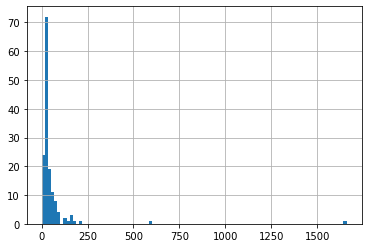

In [57]:
# case count
count_case = case_filter.groupby('subject_id').apply(lambda x: x.eve_index.size)
count_case.hist(bins=100)
print(np.histogram(count_case))
print(np.mean(count_case)); print(np.median(count_case)); print(np.std(count_case))

count_case.describe()

In [58]:
case_filter =pd.merge(case_filter, all_count,on='subject_id',how='left')

In [59]:
case_filter.head()

,Unnamed: 0,events,subject_id,time,eve_index,index_date,count
0,60813,V270,10026821,2134-06-02 07:12:00,26406,2138-05-20 08:20:00,57
1,60814,741,10026821,2134-06-02 07:12:00,6699,2138-05-20 08:20:00,57
2,60815,65971,10026821,2134-06-02 07:12:00,5645,2138-05-20 08:20:00,57
3,60816,65681,10026821,2134-06-02 07:12:00,5612,2138-05-20 08:20:00,57
4,60105,timetoken0-2day,10026821,2134-06-02 07:12:00,36802,2138-05-20 08:20:00,57


In [60]:
np.unique(case_filter.subject_id).size

148

In [61]:
case_filter_out = case_filter.loc[((case_filter['count']>10) & (case_filter['count']<500)),:]

In [62]:
case_filter_out.head()

,Unnamed: 0,events,subject_id,time,eve_index,index_date,count
0,60813,V270,10026821,2134-06-02 07:12:00,26406,2138-05-20 08:20:00,57
1,60814,741,10026821,2134-06-02 07:12:00,6699,2138-05-20 08:20:00,57
2,60815,65971,10026821,2134-06-02 07:12:00,5645,2138-05-20 08:20:00,57
3,60816,65681,10026821,2134-06-02 07:12:00,5612,2138-05-20 08:20:00,57
4,60105,timetoken0-2day,10026821,2134-06-02 07:12:00,36802,2138-05-20 08:20:00,57


In [63]:
# get sample from control
np.random.seed(6250)
sample_ids = np.random.choice(np.unique(control_filter_out.subject_id),2000,replace=False)
control_out = control_filter_out.loc[np.in1d(control_filter_out['subject_id'],sample_ids),:]

In [64]:
np.unique(control_out.subject_id).size

2000

In [65]:
control_out.reset_index(inplace=True)

In [66]:
np.unique(case_filter_out.subject_id).size

146

In [67]:
case_filter_out.shape

(6021, 7)

In [68]:
demographic = pd.read_csv("../data/patients.csv",index_col = 0)

In [69]:
adm = pd.read_csv("../data/admissions.csv",index_col = 0)

In [70]:
def get_demographic(data):
    d = data.merge(demographic, how = "left", on = "subject_id")
    dd = d.merge(adm, how = "left", on = "subject_id")
    demoo = dd.loc[:, ["subject_id", "index_date", "gender", "anchor_age", "anchor_year", "ethnicity"]].drop_duplicates()
    print(demoo["index_date"])
    print(demoo["anchor_age"])
    print(demoo["anchor_year"])
    #calculate the age for the patients
    age = pd.to_datetime(demoo.index_date)
    demoo["AGE"] = age.apply(lambda x: x.year)-demoo['anchor_year']+demoo['anchor_age']
    demoo = demoo.drop(["anchor_age", "anchor_year","index_date"], axis = 1)
    demo_full = demoo.merge(pd.get_dummies(demoo.ethnicity), left_index= True, right_index= True)
    #gender 1 is M 0 is F
    demo_full.gender = demo_full.gender.apply(lambda x: 1 if x == "M" else 0)
    
    
    return demo_full.drop(["ethnicity"], axis = 1)

In [71]:
control_demo = get_demographic(control_out)

0        2169-10-29 20:00:00
74       2147-08-30 11:00:00
106      2153-09-25 14:00:00
283      2164-05-03 20:00:00
328      2140-09-17 13:00:00
                 ...        
487034   2152-02-06 10:00:00
487074   2157-02-17 08:00:00
487125   2172-02-23 13:00:00
487137   2119-03-16 10:00:00
487173   2155-12-12 08:00:00
Name: index_date, Length: 2059, dtype: datetime64[ns]
0         85
74        71
106       58
283       50
328       44
          ..
487034    81
487074    31
487125     0
487137    87
487173    91
Name: anchor_age, Length: 2059, dtype: int64
0         2169
74        2146
106       2153
283       2164
328       2140
          ... 
487034    2152
487074    2156
487125    2172
487137    2119
487173    2155
Name: anchor_year, Length: 2059, dtype: int64


In [72]:
control_demo.head()

,subject_id,gender,AGE,AMERICAN INDIAN/ALASKA NATIVE,ASIAN,BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,OTHER,UNABLE TO OBTAIN,UNKNOWN,WHITE
0,10005012,0,85,0,0,0,0,0,0,0,1
74,10006835,0,72,0,0,0,0,0,0,0,1
106,10009628,1,58,0,0,0,1,0,0,0,0
283,10009686,0,50,0,0,0,0,0,0,0,1
328,10019992,0,44,0,0,0,0,0,0,0,1


In [73]:
control_demo.shape

(2059, 11)

In [74]:
control_demo_female=control_demo[~control_demo['gender'].isin([1])]

In [75]:
control_demo_female.shape[0]

1041

In [76]:
control_demo_female_age=control_demo_female[control_demo_female.AGE<50]

In [77]:
control_demo_fa=control_demo_female_age[control_demo_female_age.AGE>20]

In [78]:
np.unique(control_demo_fa.subject_id).size

316

In [86]:
control_demo_FA=control_demo_fa.head(311)

In [87]:
np.unique(control_demo_FA.subject_id).size

292

In [88]:
control_demo_FA.head()

,subject_id,gender,AGE,AMERICAN INDIAN/ALASKA NATIVE,ASIAN,BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,OTHER,UNABLE TO OBTAIN,UNKNOWN,WHITE
328,10019992,0,44,0,0,0,0,0,0,0,1
1435,10078892,0,37,0,0,0,0,0,0,0,1
2448,10114736,0,49,0,0,0,0,0,0,0,1
4073,10182430,0,39,0,0,1,0,0,0,0,0
4074,10182430,0,39,0,0,0,0,1,0,0,0


In [89]:
np.unique(case_filter_out.subject_id).size

146

In [90]:
np.unique(control_demo_FA.subject_id).size

292

In [91]:
control_out.head()

,index,Unnamed: 0,events,subject_id,time,eve_index,index_date,count
0,12328,13154,lisinopril,10005012,2169-10-23 10:00:00,32963,2169-10-29 20:00:00,74
1,12329,13155,clopidogrel,10005012,2169-10-23 10:00:00,30222,2169-10-29 20:00:00,74
2,12330,13156,folic acid,10005012,2169-10-23 10:00:00,31551,2169-10-29 20:00:00,74
3,12331,13157,furosemide,10005012,2169-10-23 10:00:00,31594,2169-10-29 20:00:00,74
4,12332,13158,aspirin,10005012,2169-10-23 10:00:00,29171,2169-10-29 20:00:00,74


In [92]:
control_out2=pd.merge(control_out,control_demo_FA,how='inner',on=["subject_id"])

In [93]:
control_out2.head()

,index,Unnamed: 0,events,subject_id,time,eve_index,index_date,count,gender,AGE,AMERICAN INDIAN/ALASKA NATIVE,ASIAN,BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,OTHER,UNABLE TO OBTAIN,UNKNOWN,WHITE
0,44664,46695,30590,10019992,2140-09-16 20:55:00,2634,2140-09-17 13:00:00,18,0,44,0,0,0,0,0,0,0,1
1,44665,46696,3051,10019992,2140-09-16 20:55:00,2606,2140-09-17 13:00:00,18,0,44,0,0,0,0,0,0,0,1
2,44666,46697,30560,10019992,2140-09-16 20:55:00,2623,2140-09-17 13:00:00,18,0,44,0,0,0,0,0,0,0,1
3,44667,46698,30550,10019992,2140-09-16 20:55:00,2619,2140-09-17 13:00:00,18,0,44,0,0,0,0,0,0,0,1
4,44668,46699,E8499,10019992,2140-09-16 20:55:00,11730,2140-09-17 13:00:00,18,0,44,0,0,0,0,0,0,0,1


In [94]:
np.unique(control_out2.subject_id).size

292

In [95]:
control_out2.loc[:,['subject_id','time','eve_index']]

,subject_id,time,eve_index
0,10019992,2140-09-16 20:55:00,2634
1,10019992,2140-09-16 20:55:00,2606
2,10019992,2140-09-16 20:55:00,2623
3,10019992,2140-09-16 20:55:00,2619
4,10019992,2140-09-16 20:55:00,11730
...,...,...,...
21045,19347423,2167-02-10 16:00:00,36802
21046,19347423,2167-02-11 16:00:00,36584
21047,19347423,2167-02-11 16:00:00,36802
21048,19347423,2167-02-12 19:00:00,36584


In [96]:
if with_time:
    control_out2.loc[:,['subject_id','time','eve_index']].to_csv('../cleaned_data/control_w_time.csv')
    case_filter_out.loc[:,['subject_id','time','eve_index']].to_csv('../cleaned_data/case_w_time.csv')
else:
    control_out2.loc[:,['subject_id','time','eve_index']].to_csv('../cleaned_data/control.csv')
    case_filter_out.loc[:,['subject_id','time','eve_index']].to_csv('../cleaned_data/case.csv')

In [97]:
control_demo_FA.head()

,subject_id,gender,AGE,AMERICAN INDIAN/ALASKA NATIVE,ASIAN,BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,OTHER,UNABLE TO OBTAIN,UNKNOWN,WHITE
328,10019992,0,44,0,0,0,0,0,0,0,1
1435,10078892,0,37,0,0,0,0,0,0,0,1
2448,10114736,0,49,0,0,0,0,0,0,0,1
4073,10182430,0,39,0,0,1,0,0,0,0,0
4074,10182430,0,39,0,0,0,0,1,0,0,0


In [98]:
np.unique(case_filter_out.subject_id).size

146

In [99]:
case_demo = get_demographic(case_filter_out)

0       2138-05-20 08:20:00
50      2138-05-27 06:21:00
114     2136-11-18 20:13:00
152     2145-05-15 13:36:00
167     2185-06-12 18:53:00
                ...        
23778   2155-03-28 22:37:00
24042   2141-12-19 08:42:00
24120   2147-03-02 19:11:00
24230   2133-04-05 09:37:00
24310   2150-03-11 13:10:00
Name: index_date, Length: 177, dtype: datetime64[ns]
0        31
50       35
114      33
152      26
167      31
         ..
23778    23
24042    33
24120    40
24230    21
24310    32
Name: anchor_age, Length: 177, dtype: int64
0        2134
50       2135
114      2136
152      2137
167      2180
         ... 
23778    2149
24042    2140
24120    2147
24230    2122
24310    2148
Name: anchor_year, Length: 177, dtype: int64


In [100]:
case_demo.head()

,subject_id,gender,AGE,AMERICAN INDIAN/ALASKA NATIVE,ASIAN,BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,OTHER,UNKNOWN,WHITE
0,10026821,0,35,0,0,0,0,0,0,1
50,10078279,0,38,0,0,0,0,0,0,1
114,10130191,0,33,0,0,0,0,1,0,0
152,10183015,0,34,0,1,0,0,0,0,0
167,10230631,0,36,0,0,0,0,0,0,1


In [101]:
if with_time:
    control_demo_FA.to_csv('../cleaned_data/control_demo_wt.csv')
    case_demo.to_csv('../cleaned_data/case_demo_wt.csv')
else:
    control_demo_FA.to_csv('../cleaned_data/control_demo.csv')
    case_demo.to_csv('../cleaned_data/case_demo.csv')